**Importando arquivo .CSV para o Grafo**

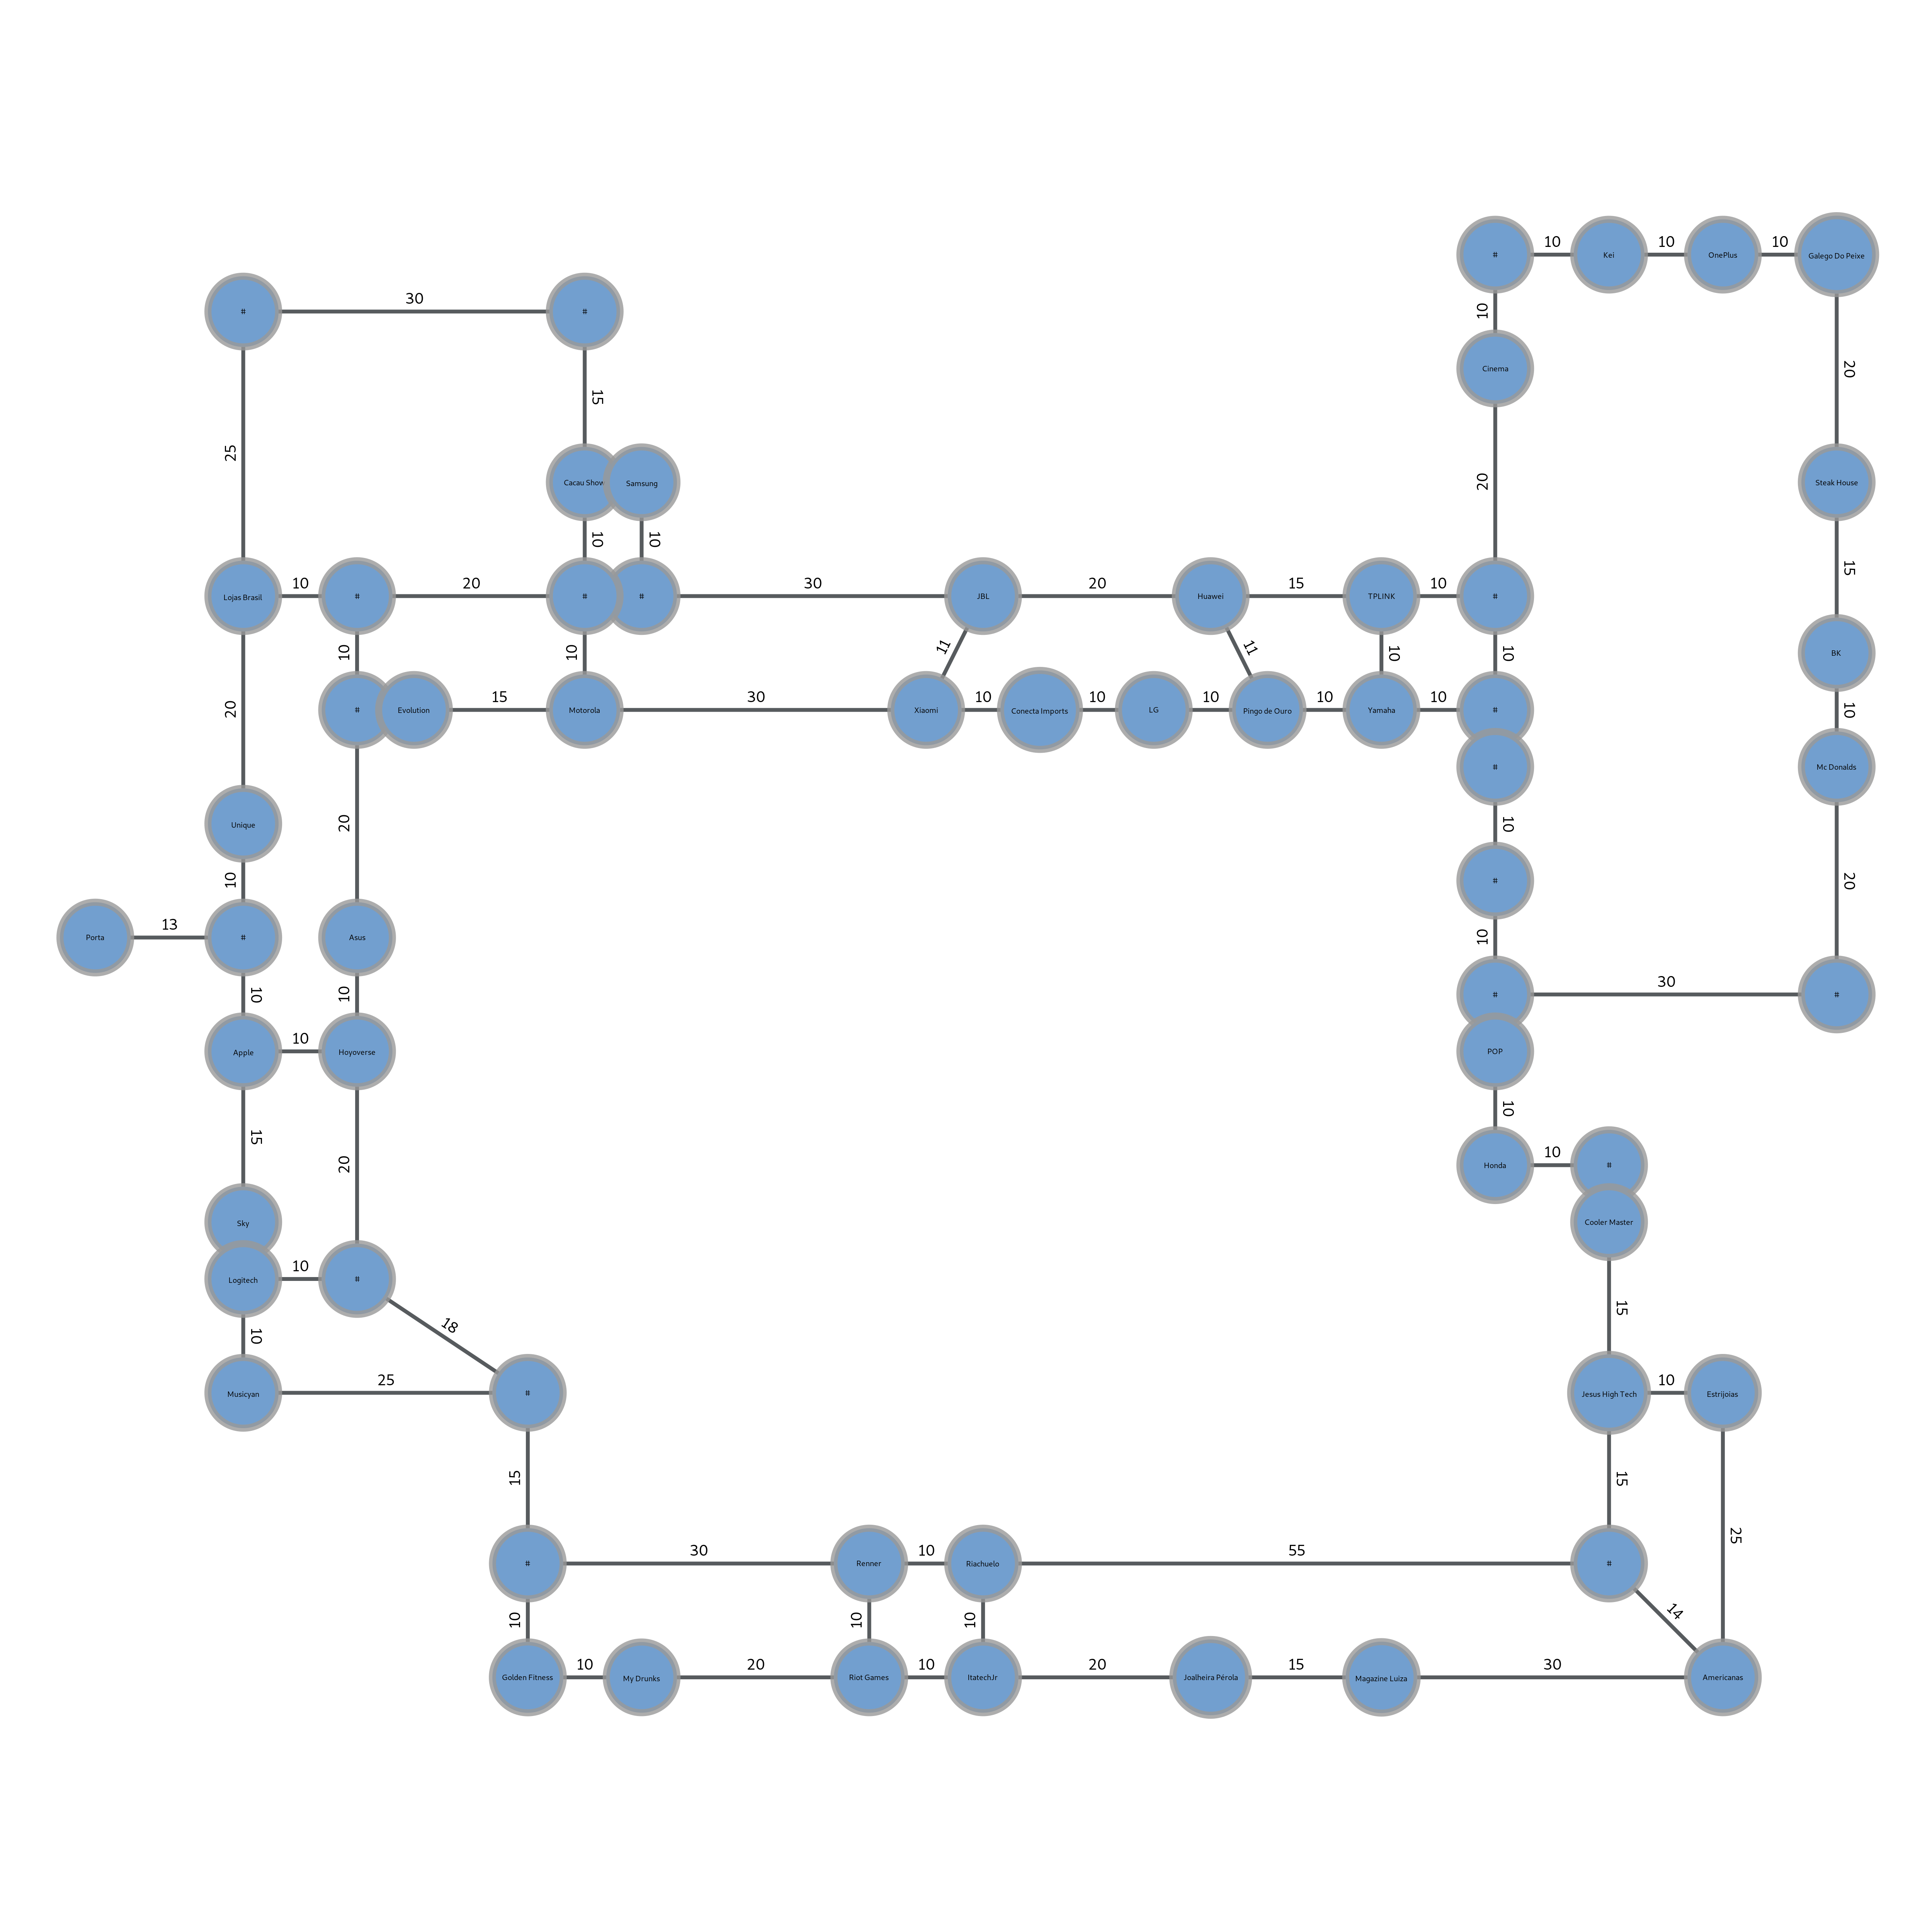

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7efe035598d0, at 0x7efe1820d2b0>

In [1]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv                                        # Biblioteca para Leitura do csv

g = gt.Graph() 
g.set_directed(False)                             # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
v_pos  = g.new_vertex_property("vector<double>")
e_distance = g.new_edge_property("string") 
#Criação dos vértices no grafo à partir do arquivo .csv de vértices
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")

vposX = []
vposY = []
for vertice in reader_network:
    v = g.add_vertex()
    v_name[v] = str(vertice[1]) # Adicionando nome do vertice
    vposX.append(vertice[5]) # Adicionando posição X
    vposY.append(vertice[6]) # Adicionando posição Y
f_network.close()

#Criação das arestas no grafo à partir do arquivo .cvs de arestas
f_network = open("arestas.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for edge in reader_network:
    e = g.add_edge(int(edge[0]), int(edge[1]))
    e_distance[e] = str(edge[3])
    
f_network.close()

#Preenchendo as posições X e Y dos vértices
for v in g.vertices():
    v_pos[v] = (vposX[int(v)],vposY[int(v)])

#Desenhando o grafo
gt.graph_draw(g, pos=v_pos, #pos=gt.arf_layout(visual_G),
               vertex_text= v_name,
               edge_text = e_distance,
               edge_pen_width = 10,              
               vertex_font_size=20,
               edge_font_size = 40,
               vertex_shape="circle",
               vertex_fill_color="#729fcf",
               output_size=(5000, 5000))
               #output="two-nodes.png")
            

**Busca em Largura - Ordem de Expansão dos Nodos**

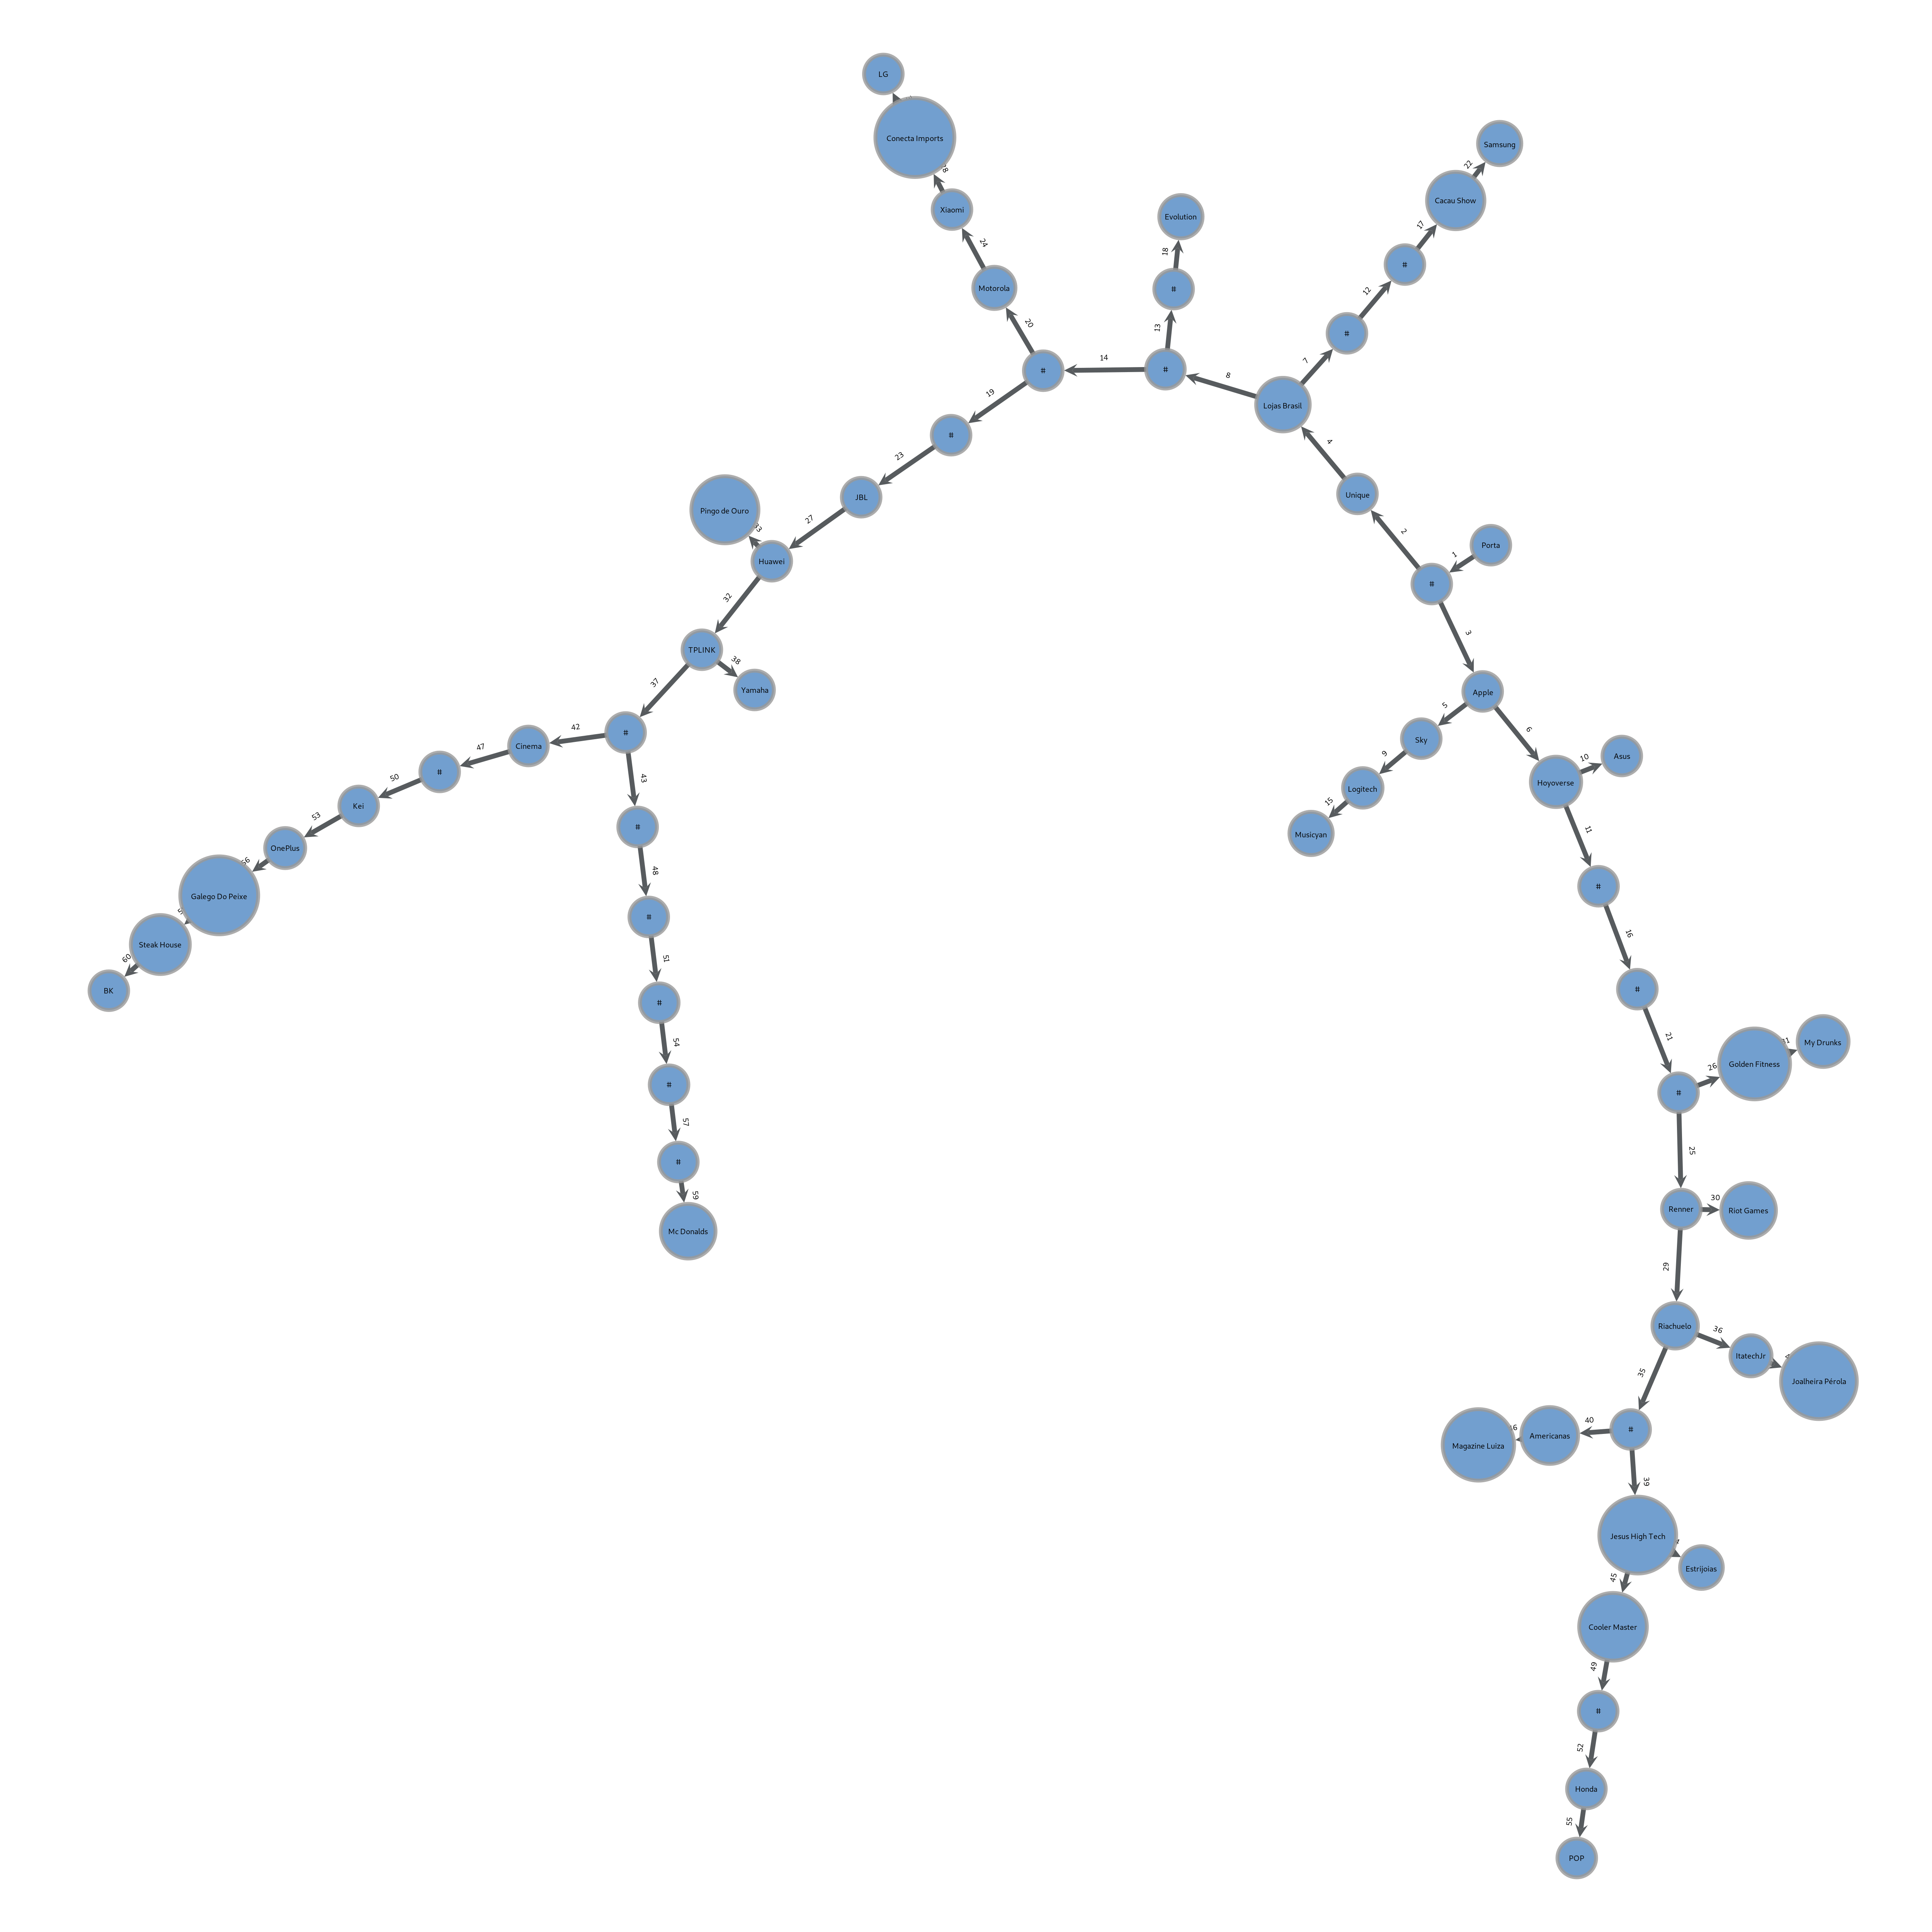

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7efde31a2710, at 0x7efde31a2ba8>

In [2]:
import graph_tool.all as gt                           # Biblioteca para GRAFO
g_bfs = gt.Graph()                                    # criação do objeto para busca em Largura
v_name_bfs = g_bfs.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
e_ord = g_bfs.new_edge_property("int")                # referenciação da lista e_ord com uma nova propriedade criada para a ordem de expansão - tipo int

#Criação dos vértices no grafo à partir do arquivo .cvs de vértices
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for vertice in reader_network:
    v = g_bfs.add_vertex()
    v_name_bfs[v] = str(vertice[1])
f_network.close()

#Busca em Largura (dfs) e geração das arestas
ord = 1
for edge in gt.bfs_iterator(g, g.vertex(0)):
#    print(v_name[int(edge.source())], "->", v_name[int(edge.target())])
   e = g_bfs.add_edge(int(edge.source()), int(edge.target()))
#    print(vertice[1])
   e_ord[e] = ord
   ord += 1

#Desenhando o grafo
size = 5000
v_size = size / 50
e_pwidth = v_size / 8
gt.graph_draw(g_bfs,#pos=gt.sfdp_layout(g_bfs),
              vertex_size = v_size,
              vertex_text= v_name_bfs,
              edge_text= e_ord,
              vertex_font_size=20,
              edge_font_size = 20,
              edge_pen_width = e_pwidth,
              vertex_shape="circle",
              vertex_fill_color="#729fcf",
              output_size=(size, size))
              #output="two-nodes.png")           


**Busca em Largura - Busca e Apresentação do Caminho**

In [3]:
class VisitorExample(gt.BFSVisitor):                                            # É um objeto visitante que é chamado nos pontos de evento dentro do algoritmo bfs_search()

    def __init__(self, name, pred, dist, time, name_time, color, v_color):
        self.name = name
        self.pred = pred
        self.dist = dist
        self.time = time
        self.name_time = name_time
        self.last_time = 0
        self.color = color
        self.fill_color = v_color

    def discover_vertex(self, u):                                               # Invocado quando um vértice é encontrado pela primeira vez.
        self.name[u] = v_name[u]
        self.time[u] = self.last_time
        self.last_time += 1        
        self.name_time[u] = str(self.name[u]) + "(" + str(self.time[u]) + ")"
        #print("-->", self.name[u], "foi encontrado e entrou na FILA") 
        self.fill_color[u] = "white"
   # def examine_vertex(self, u):                                                # Invocado em um vértice à medida que é retirado da fila.         
   #     print(self.name[u], "saiu da FILA e está sendo analisado (expandido)...") 

    def tree_edge(self, e):                                                     # Invocado em cada aresta à medida que se torna um 
        self.pred[e.target()] = int(e.source())                                 # membro das arestas que formam a árvore de pesquisa.
        self.dist[e.target()] = self.dist[e.source()] + 1
        e = g_bfs.add_edge(int(e.source()), int(e.target()))
        self.color[e] = "gray"

   # def finish_vertex(self, u):
   #     print("Todos os vértices adjacentes à", self.name[u], "foram descobertos!") 


In [5]:
#Busca em Largura (bfs) e geração das arestas
g_bfs = gt.Graph()                                      # criação do objeto para busca em Largura
v_name_bfs   = g_bfs.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
v_name_time  = g_bfs.new_vertex_property("string")      # referenciação da lista timed com uma nova propriedade da aresta criada para a ordem de expansão - tipo int
dist         = g_bfs.new_vertex_property("int")         # referenciação da lista dist como uma propriedade do vértice criada para a distância da raiz
pred         = g_bfs.new_vertex_property("int64_t")     # referenciação da lista pred como uma propriedade do vétice criada para referenciar o predecessor (pai)
time         = g_bfs.new_vertex_property("int")         # referenciação da lista timed com uma nova propriedade da aresta criada para a ordem de expansão - tipo int
color        = g_bfs.new_edge_property("string")        # referenciação da lista ecolor com uma nova propriedade criada para a aresta - tipo string  
v_color      = g_bfs.new_vertex_property("string")    # referenciação da lista ecolor com uma nova propriedade criada para o vértice - tipo string  

print("---------------------------------------------")
print("> Busca em Largura - Caminhamento pelos Estados")
print("---------------------------------------------\n")
#raiz = 'Porta'
#alvo = 'Americanas'

lista_caminho = []
#lista_raiz = []
#index_raiz = list(v_name).index(raiz)

arvore = Arvore()
#print(list(v_name))
#importante, colocar o for
#colocar lista_de raiz que vai guardar a lista de destinos
for raiz in v_name:
    #lista_caminho = []
    arvore_Destino = Arvore()
    index_raiz = list(v_name).index(raiz)
    #colocar um if aqui, pois esta pegando o jogo da velha
    for destino in v_name:
        if destino != raiz and destino != '#':
            gt.bfs_search(g, g.vertex(index_raiz), VisitorExample(v_name_bfs, pred, dist, time, v_name_time, color, v_color))
            
            chave = list(v_name).index(destino)
            #print("\n> Procura de um Estado e Caminho:")
            #print("-----------------------------\n")
            index = list(v_name_bfs).index(destino)  # Localizando o índice do Estado a ser encontrado
            path = []                                       # array do caminho
            id_caminho = []

            path.insert(0,v_name_bfs[index])  # inserções sendo realizadas no início
            v_color[index] = "green"
            id_caminho.insert(0, index)
            while index != index_raiz:
                e = g_bfs.edge(pred[index], index)
                color[e] = "red"
                index = pred[index]
                path.insert(0,v_name_bfs[index])
                id_caminho.insert(0, index)
                v_color[index] = "#729fcf"
            v_color[index_raiz] = "#729fcf"; 
            #no = No_Destino(destino, id_caminho)
            #no.raiz = raiz
            #no.destino = destino
            #no.caminho = id_caminho #caminho com os id esta aqui
            #lista_caminho.append(no)
            #print(list(id_caminho))
            arvore_Destino.inserir_Destino(chave, destino, id_caminho)
    #no_Raiz = No_Raiz(raiz, lista_caminho)
    #lista_raiz.append(no_Raiz)
    arvore.inserir(index_raiz, raiz, arvore_Destino)
    

#for l in lista_raiz:
#    if l.raiz == 'Huawei':
#       for li in l.caminho:
#            print("Caminho da Huawei")
#            print(li.destino)
#            print(li.caminho)

# print("Cores Vértices.........:", list(v_color))

# print("Caminho encontrado.....:",path)                   # mostrando o caminho encontrado da raiz ao alvo

#comentado essa parte para testar o codigo
#Desenhando o grafo
#size = 5000
#v_size = size / 50
#e_pwidth = v_size / 8
#gt.graph_draw(g_bfs, #pos=gt.sfdp_layout(g_bfs),
#              vertex_size = v_size,
#              vertex_text= v_name_bfs,
#              #edge_text= time,
#              edge_color= color,
#              vertex_font_size=20,
#              edge_font_size = 8,
#              edge_pen_width = e_pwidth,
#              vertex_fill_color=v_color,              
#              vertex_shape="circle",
              #vertex_fill_color="#729fcf",
#              output_size=(size, size))
              #output="two-nodes.png")    







---------------------------------------------
> Busca em Largura - Caminhamento pelos Estados
---------------------------------------------



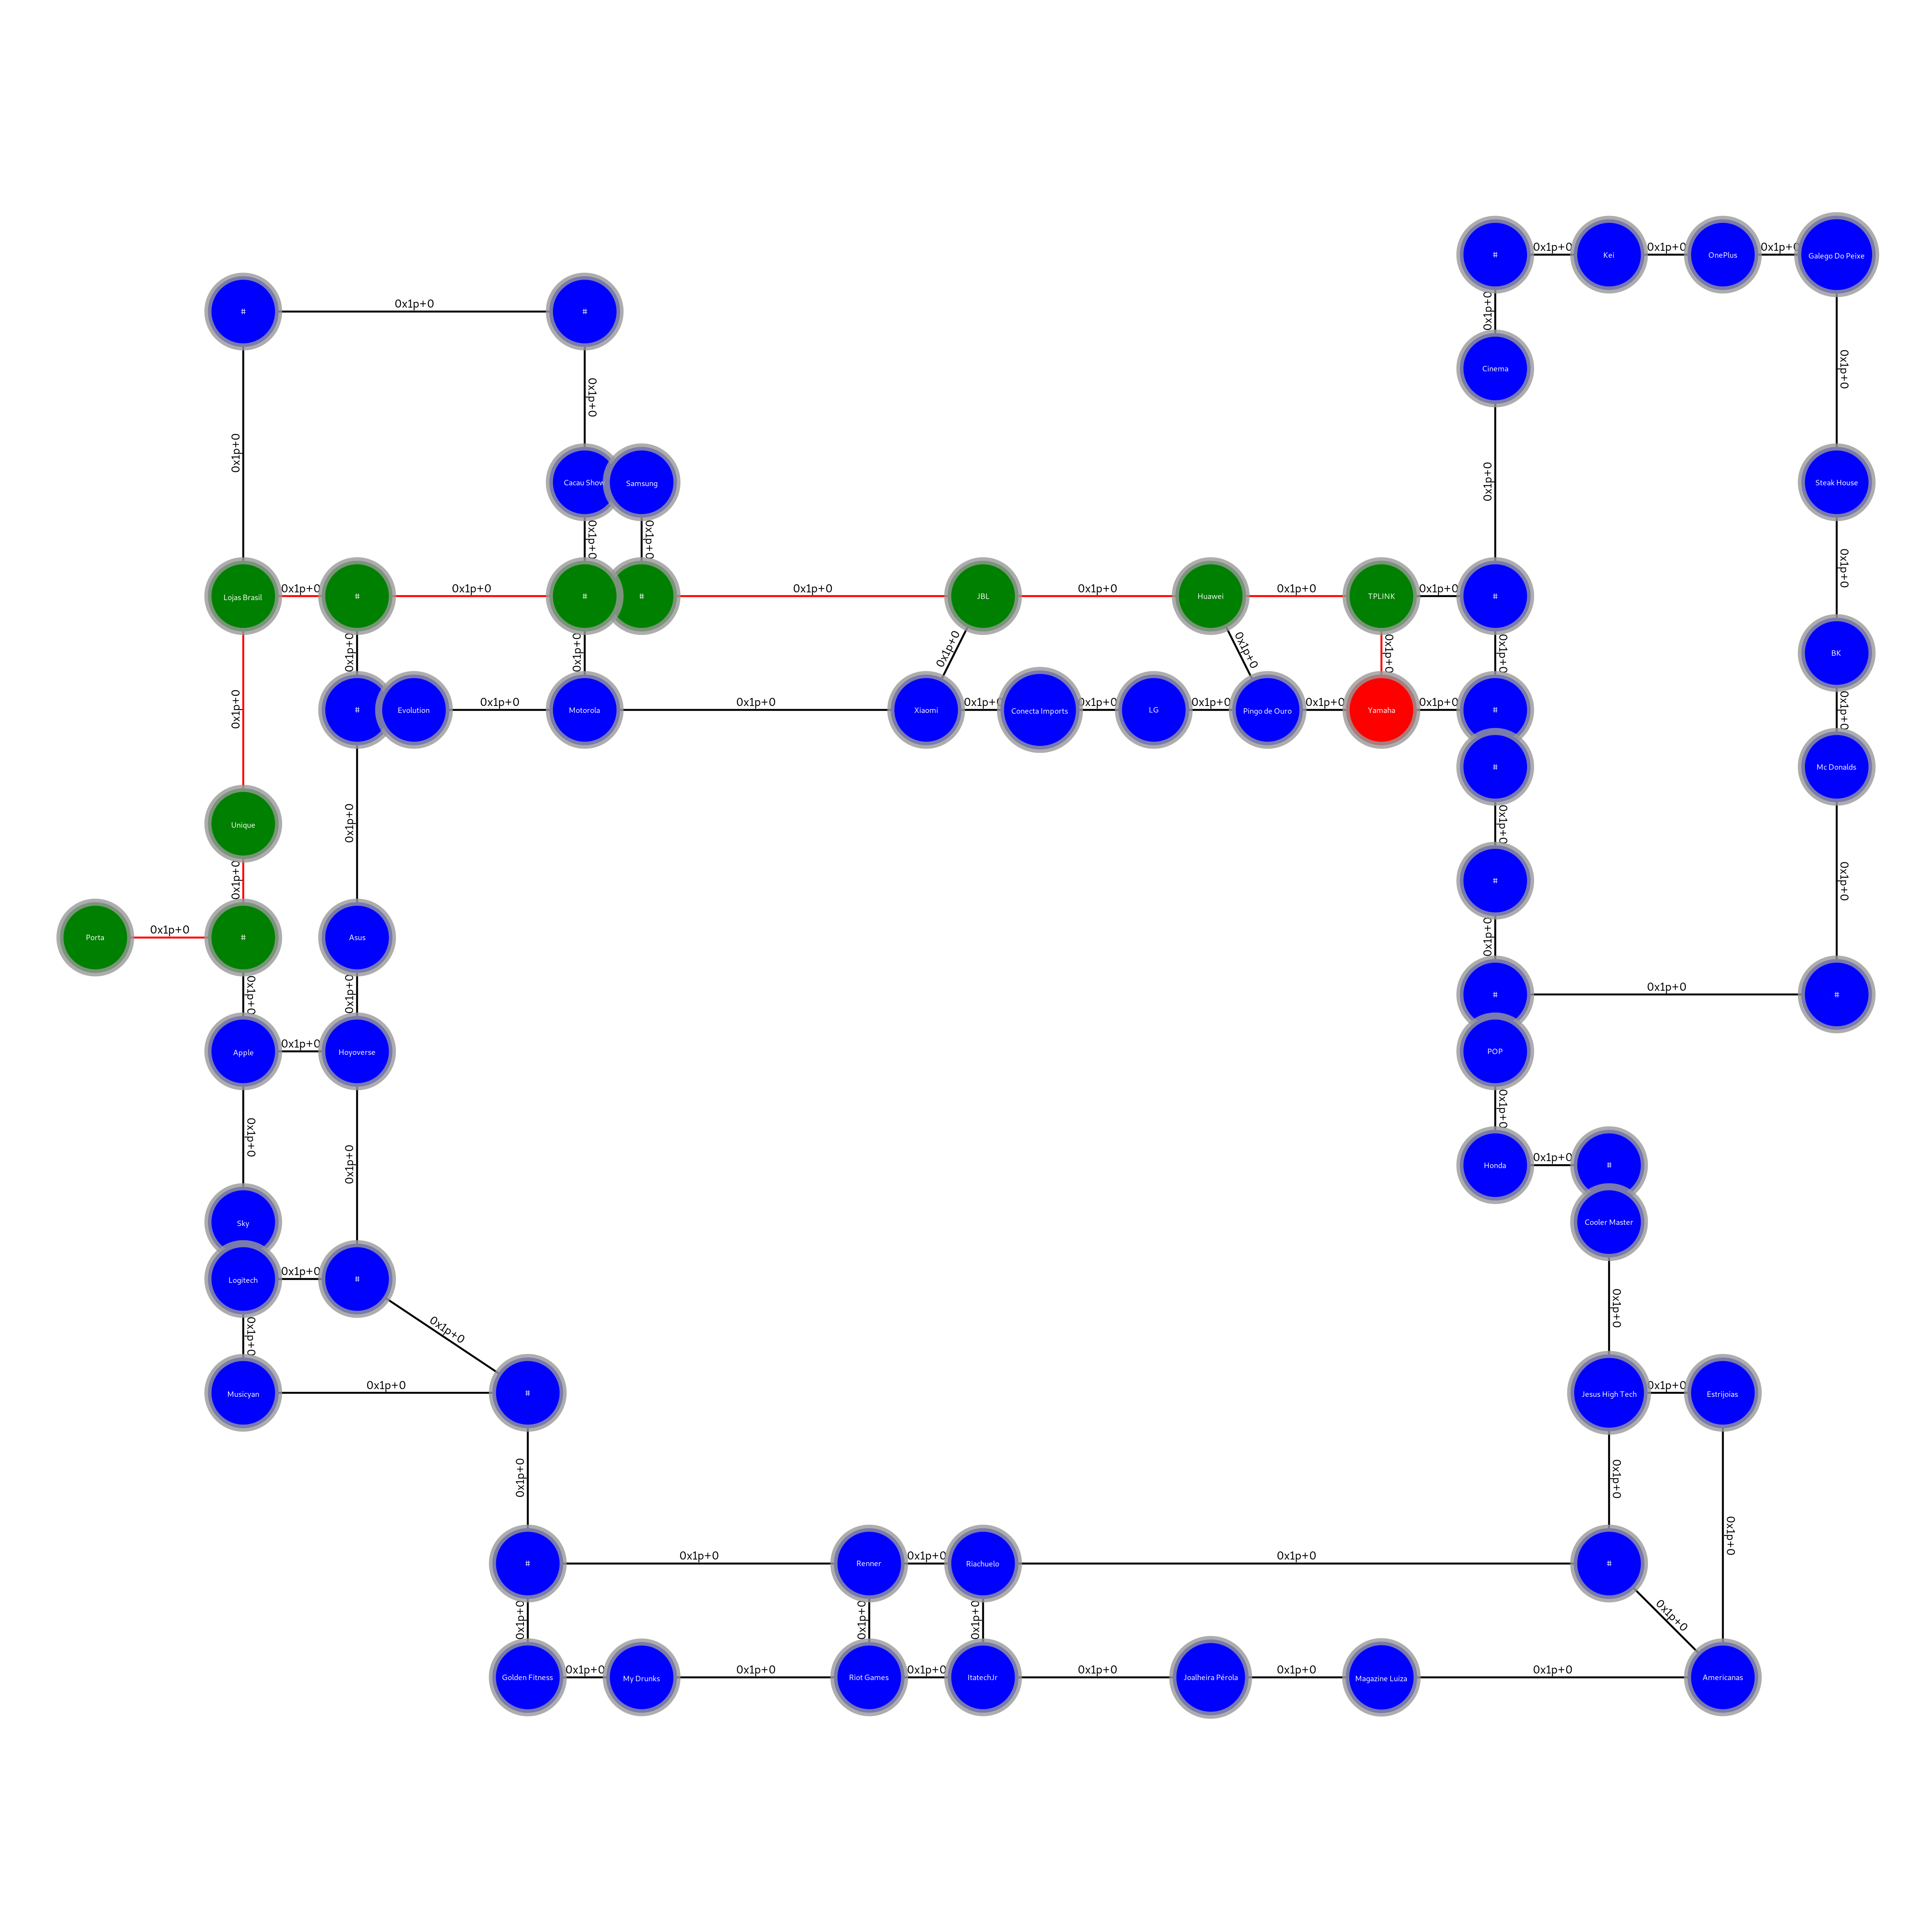

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f59da3e35c0, at 0x7f59dd2931d0>

In [9]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv                                        # Biblioteca para Leitura do csv

g = gt.Graph() 
g.set_directed(False)                             # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
v_pos  = g.new_vertex_property("vector<double>")
e_distance = g.new_edge_property("string") 
e_weight = g.new_edge_property("float")  
e_action = g.new_edge_property("string") 
bfse_color = g.new_edge_property("string")  
bfsv_color = g.new_vertex_property("string") 

#Criação dos vértices no grafo à partir do arquivo .csv de vértices
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")

vposX = []
vposY = []
for vertice in reader_network:
    v = g.add_vertex()
    bfsv_color[v] = "blue" 
    v_name[v] = str(vertice[1]) # Adicionando nome do vertice
    vposX.append(vertice[5]) # Adicionando posição X
    vposY.append(vertice[6]) # Adicionando posição Y
f_network.close()


#Criação das arestas no grafo à partir do arquivo .cvs de arestas
f_network = open("arestas.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for edge in reader_network:
    e = g.add_edge(int(edge[0]), int(edge[1]))
    bfse_color[e] = "black"
    i = 0
    #pintando as arestas
    for pa in id_caminho:
        if pa == int(edge[0]) or pa == int(edge[1]):
           i+=1
        
    if i == 2:
       bfse_color[e] = "red"
    e_weight[e] = float(edge[2])
    #print("pesos")
    #print(e_weight[e])
    e_distance[e] = str(edge[3])
   
f_network.close()

#print("lista de peso")
#for a in e_weight:
#    print(a)

#print(" > Lista de Transições: ",g.get_edges())


#Preenchendo as posições X e Y dos vértices
for v in g.vertices():
    v_pos[v] = (vposX[int(v)],vposY[int(v)])

#pintando os vertices
tamanho = len(id_caminho)
i = 0
for pa in id_caminho:
    i += 1
    for v in g.vertices():
       if pa == v:
          bfsv_color[pa] = 'green'
       if i == tamanho:
          bfsv_color[pa] = 'red'

gt.graph_draw(g, pos=v_pos,
               vertex_text= v_name,
               edge_text = e_weight,
               edge_color= bfse_color,
               edge_pen_width = 5,  
               vertex_font_size=20,
               edge_font_size = 30,
               vertex_shape="circle",
               vertex_fill_color=bfsv_color,
               output_size=(5000, 5000))
               #output="two-nodes.png")

In [4]:
class No_Destino:
      def __init__(self, destino, caminho):
        self.destino = destino
        self.caminho = caminho
class No_Raiz:
    def __init__(self, raiz, listaCaminho):
        self.raiz = raiz
        self.caminho = listaCaminho
class Lista_Raiz:
    def __init__(self):
        self.head = None
        self.tail = None
    def add_raiz(self, raiz, caminho):
        no = No_Raiz(raiz, caminho)
        if self.head == None:
            self.head = no
            self.tail = no     
        else:
            self.tail.next = no
class No_Raiz_Tree:         
      def __init__(self, chave, raiz, arvoreDestino):
            self.chave = chave
            self.raiz = raiz
            self.arvoreDestino = arvoreDestino
            self.esquerda = None
            self.direita = None
            
class No_Destino_Tree:
       def __init__(self, chave, destino, caminho):
            self.chave = chave
            self.destino = destino
            self.esquerda = None
            self.direita = None
            self.caminho = caminho

class Arvore:
    def __init__(self):
        self.raiz = None

# Metodos de Busca
    def inserir(self, chave, raiz, arvoreDestino):
        novo_no = No_Raiz_Tree(chave, raiz, arvoreDestino)

        if self.raiz is None:
            self.raiz = novo_no
        else:
            self.inserir_recursivamente(novo_no, self.raiz)

    def inserir_Destino(self, chave, destino, caminho):
        novo_no = No_Destino_Tree(chave, destino, caminho)

        if self.raiz is None:
            self.raiz = novo_no
        else:
            self.inserir_recursivamente(novo_no, self.raiz)

            
    def inserir_recursivamente(self, novo_no, no_atual):
        if novo_no.chave < no_atual.chave:
            if no_atual.esquerda is None:
                no_atual.esquerda = novo_no
            else:
                self.inserir_recursivamente(novo_no, no_atual.esquerda)
        else:
            if no_atual.direita is None:
                no_atual.direita = novo_no
            else:
                self.inserir_recursivamente(novo_no, no_atual.direita)
                
    def percorrerDestino(self, no_atual):
        if no_atual is not None:
            self.percorrerDestino(no_atual.esquerda)
            #print(no_atual.chave)
            print("======================")
            print("Caminho até o destino " + no_atual.destino)
            print(list(no_atual.caminho))
            self.percorrerDestino(no_atual.direita)
            
    def percorrer_in_ordem(self, no_atual):
        if no_atual is not None:
            self.percorrer_in_ordem(no_atual.esquerda)
            #print(no_atual.chave)
            print("======================")
            print(no_atual.raiz)
            print(no_atual.chave)
            print("Todos os caminhos possiveis")
            self.percorrerDestino(no_atual.arvoreDestino.raiz)
            self.percorrer_in_ordem(no_atual.direita)
   

In [6]:
arvore.percorrer_in_ordem(arvore.raiz)

#arvore.percorrer_in_destino(arvore.raiz.arvoreDestino)
#for raiz in v_name:
#    print(list(v_name).index(raiz))
        

Porta
0
Todos os caminhos possiveis
Caminho até o destino Unique
[0, 1, 2]
Caminho até o destino Lojas Brasil
[0, 1, 2, 3]
Caminho até o destino Cacau Show
[0, 1, 2, 3, 4, 5, 6]
Caminho até o destino Samsung
[0, 1, 2, 3, 4, 5, 6, 7]
Caminho até o destino JBL
[0, 1, 2, 3, 45, 44, 8, 9]
Caminho até o destino Huawei
[0, 1, 2, 3, 45, 44, 8, 9, 10]
Caminho até o destino TPLINK
[0, 1, 2, 3, 45, 44, 8, 9, 10, 11]
Caminho até o destino Cinema
[0, 1, 2, 3, 45, 44, 8, 9, 10, 11, 12, 13]
Caminho até o destino Kei
[0, 1, 2, 3, 45, 44, 8, 9, 10, 11, 12, 13, 14, 15]
Caminho até o destino OnePlus
[0, 1, 2, 3, 45, 44, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Caminho até o destino Galego Do Peixe
[0, 1, 2, 3, 45, 44, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Caminho até o destino Steak House
[0, 1, 2, 3, 45, 44, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Caminho até o destino BK
[0, 1, 2, 3, 45, 44, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Caminho até o destino Mc Donalds
[0, 1, 2, 3, 45, 44, 8, 9, 10, 11, 12

[1, 2, 3, 45, 44, 8, 9, 10, 11, 57]
#
1
Todos os caminhos possiveis
Caminho até o destino Porta
[1, 0]
Caminho até o destino Unique
[1, 2]
Caminho até o destino Lojas Brasil
[1, 2, 3]
Caminho até o destino Cacau Show
[1, 2, 3, 4, 5, 6]
Caminho até o destino Samsung
[1, 2, 3, 4, 5, 6, 7]
Caminho até o destino JBL
[1, 2, 3, 45, 44, 8, 9]
Caminho até o destino Huawei
[1, 2, 3, 45, 44, 8, 9, 10]
Caminho até o destino TPLINK
[1, 2, 3, 45, 44, 8, 9, 10, 11]
Caminho até o destino Cinema
[1, 2, 3, 45, 44, 8, 9, 10, 11, 12, 13]
Caminho até o destino Kei
[1, 2, 3, 45, 44, 8, 9, 10, 11, 12, 13, 14, 15]
Caminho até o destino OnePlus
[1, 2, 3, 45, 44, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Caminho até o destino Galego Do Peixe
[1, 2, 3, 45, 44, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Caminho até o destino Steak House
[1, 2, 3, 45, 44, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Caminho até o destino BK
[1, 2, 3, 45, 44, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Caminho até o destino Mc Donalds
[1, 2, 3,

[1, 49, 39, 38, 37, 36, 46, 47, 48, 29, 30]
Caminho até o destino Joalheira Pérola
[1, 49, 39, 38, 37, 36, 46, 47, 32, 31]
Caminho até o destino ItatechJr
[1, 49, 39, 38, 37, 36, 46, 47, 32]
Caminho até o destino Riot Games
[1, 49, 39, 38, 37, 36, 46, 33]
Caminho até o destino My Drunks
[1, 49, 39, 38, 37, 36, 35, 34]
Caminho até o destino Golden Fitness
[1, 49, 39, 38, 37, 36, 35]
Caminho até o destino Hoyoverse
[1, 49, 39]
Caminho até o destino Asus
[1, 49, 39, 40]
Caminho até o destino Evolution
[1, 2, 3, 45, 41, 42]
Caminho até o destino Motorola
[1, 2, 3, 45, 44, 43]
Caminho até o destino Renner
[1, 49, 39, 38, 37, 36, 46]
Caminho até o destino Riachuelo
[1, 49, 39, 38, 37, 36, 46, 47]
Caminho até o destino Apple
[1, 49]
Caminho até o destino Sky
[1, 49, 50]
Caminho até o destino Logitech
[1, 49, 50, 51]
Caminho até o destino Musicyan
[1, 49, 50, 51, 52]
Caminho até o destino Xiaomi
[1, 2, 3, 45, 44, 43, 53]
Caminho até o destino Conecta Imports
[1, 2, 3, 45, 44, 43, 53, 54]
Camin

Caminho até o destino TPLINK
[16, 15, 14, 13, 12, 11]
Caminho até o destino Cinema
[16, 15, 14, 13]
Caminho até o destino Kei
[16, 15]
Caminho até o destino Galego Do Peixe
[16, 17]
Caminho até o destino Steak House
[16, 17, 18]
Caminho até o destino BK
[16, 17, 18, 19]
Caminho até o destino Mc Donalds
[16, 17, 18, 19, 20]
Caminho até o destino POP
[16, 17, 18, 19, 20, 21, 22, 23]
Caminho até o destino Honda
[16, 17, 18, 19, 20, 21, 22, 23, 24]
Caminho até o destino Cooler Master
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
Caminho até o destino Jesus High Tech
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Caminho até o destino Estrijoias
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
Caminho até o destino Americanas
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Caminho até o destino Magazine Luiza
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Caminho até o destino Joalheira Pérola
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Camin

[28, 29, 30]
Caminho até o destino Joalheira Pérola
[28, 29, 30, 31]
Caminho até o destino ItatechJr
[28, 29, 30, 31, 32]
Caminho até o destino Riot Games
[28, 29, 30, 31, 32, 33]
Caminho até o destino My Drunks
[28, 29, 30, 31, 32, 33, 34]
Caminho até o destino Golden Fitness
[28, 29, 48, 47, 46, 36, 35]
Caminho até o destino Hoyoverse
[28, 29, 48, 47, 46, 36, 37, 38, 39]
Caminho até o destino Asus
[28, 29, 48, 47, 46, 36, 37, 38, 39, 40]
Caminho até o destino Evolution
[28, 29, 48, 47, 46, 36, 37, 38, 39, 40, 41, 42]
Caminho até o destino Motorola
[28, 29, 48, 47, 46, 36, 37, 38, 39, 40, 41, 42, 43]
Caminho até o destino Renner
[28, 29, 48, 47, 46]
Caminho até o destino Riachuelo
[28, 29, 48, 47]
Caminho até o destino Apple
[28, 29, 48, 47, 46, 36, 37, 38, 39, 49]
Caminho até o destino Sky
[28, 29, 48, 47, 46, 36, 37, 38, 51, 50]
Caminho até o destino Logitech
[28, 29, 48, 47, 46, 36, 37, 38, 51]
Caminho até o destino Musicyan
[28, 29, 48, 47, 46, 36, 37, 52]
Caminho até o destino Xi

Caminho até o destino Asus
[39, 40]
Caminho até o destino Evolution
[39, 40, 41, 42]
Caminho até o destino Motorola
[39, 40, 41, 42, 43]
Caminho até o destino Renner
[39, 38, 37, 36, 46]
Caminho até o destino Riachuelo
[39, 38, 37, 36, 46, 47]
Caminho até o destino Apple
[39, 49]
Caminho até o destino Sky
[39, 49, 50]
Caminho até o destino Logitech
[39, 38, 51]
Caminho até o destino Musicyan
[39, 38, 51, 52]
Caminho até o destino Xiaomi
[39, 40, 41, 42, 43, 53]
Caminho até o destino Conecta Imports
[39, 40, 41, 42, 43, 53, 54]
Caminho até o destino LG
[39, 40, 41, 42, 43, 53, 54, 55]
Caminho até o destino Pingo de Ouro
[39, 40, 41, 42, 43, 53, 54, 55, 56]
Caminho até o destino Yamaha
[39, 40, 41, 42, 43, 53, 54, 55, 56, 57]
Asus
40
Todos os caminhos possiveis
Caminho até o destino Porta
[40, 39, 49, 1, 0]
Caminho até o destino Unique
[40, 41, 45, 3, 2]
Caminho até o destino Lojas Brasil
[40, 41, 45, 3]
Caminho até o destino Cacau Show
[40, 41, 45, 44, 6]
Caminho até o destino Samsung
[

[51, 38, 39]
Caminho até o destino Asus
[51, 38, 39, 40]
Caminho até o destino Evolution
[51, 38, 39, 40, 41, 42]
Caminho até o destino Motorola
[51, 38, 39, 40, 41, 42, 43]
Caminho até o destino Renner
[51, 52, 37, 36, 46]
Caminho até o destino Riachuelo
[51, 52, 37, 36, 46, 47]
Caminho até o destino Apple
[51, 50, 49]
Caminho até o destino Sky
[51, 50]
Caminho até o destino Musicyan
[51, 52]
Caminho até o destino Xiaomi
[51, 38, 39, 40, 41, 42, 43, 53]
Caminho até o destino Conecta Imports
[51, 38, 39, 40, 41, 42, 43, 53, 54]
Caminho até o destino LG
[51, 38, 39, 40, 41, 42, 43, 53, 54, 55]
Caminho até o destino Pingo de Ouro
[51, 38, 39, 40, 41, 42, 43, 53, 54, 55, 56]
Caminho até o destino Yamaha
[51, 38, 39, 40, 41, 42, 43, 53, 54, 55, 56, 57]
Musicyan
52
Todos os caminhos possiveis
Caminho até o destino Porta
[52, 51, 50, 49, 1, 0]
Caminho até o destino Unique
[52, 51, 50, 49, 1, 2]
Caminho até o destino Lojas Brasil
[52, 51, 50, 49, 1, 2, 3]
Caminho até o destino Cacau Show
[52,